In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

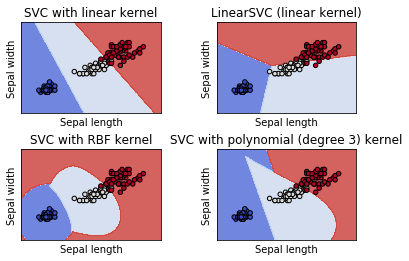

In [78]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 2:]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1  # SVM regularization parameter
SVMmodels = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in SVMmodels)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [31]:
y = iris.target
X = iris.data

for title, model in zip(titles, SVMmodels):
    model.fit(X, y)
    print(title, model.score(X, y))

SVC with linear kernel 0.9933333333333333
LinearSVC (linear kernel) 0.9666666666666667
SVC with RBF kernel 0.98
SVC with polynomial (degree 3) kernel 0.98


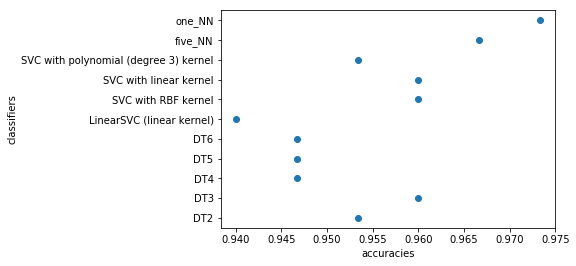

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

one_r = DecisionTreeClassifier(max_depth=1)

one_NN = KNeighborsClassifier(n_neighbors=1)

five_NN = KNeighborsClassifier(n_neighbors=5)

depths = range(2, 7)
DTs = [DecisionTreeClassifier(max_depth=i) for i in depths]
DTtitles = ['DT' + str(i) for i in depths]

all_titles = ['one_r', 'one_NN', 'five_NN'] + DTtitles + list(titles)
models = [one_r, one_NN, five_NN] + DTs + list(SVMmodels)

scores = [np.mean(cross_val_score(model, X, y, cv=10)) for model in models]

plt.plot(scores[1:], all_titles[1:], linestyle='', marker='o')
plt.xlabel('accuracies')
plt.ylabel('classifiers')
plt.show()